## 词云和对词云内容的实体识别
本记事本会注重于NLP，Spacy和实体识别部分，会跳过解释词云代码。
- Spacy,zh_core_web_sm模型导入
- 文本获取和预处理
- 基于zh_core_web_sm的实体识别
- 基于规则的（Rule Based）实体规律识别（Entity Ruler)

### 词云

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Data to dataframe
df = pd.read_excel('./data/信用卡词云22年1.1-8月.xlsx', sheet_name='Sheet1')

df.head()

,关键词,笔记数（脱敏）
0,信用卡,9587.51
1,银行,3914.69
2,手机,2689.95
3,客服,1500.31
4,孩子,1440.71


In [3]:
df.columns

Index(['关键词', '笔记数（脱敏）'], dtype='object')

In [4]:
names = ['keyword','newnotes']
df.columns = names

In [5]:
df_wc = df[['keyword', 'newnotes']][0:100]

In [6]:
#transform df to dictionary
wc_dict = {}
for word, freq in df_wc.values:
    wc_dict[word] = freq


In [7]:
font_path = './font/simhei.ttf'

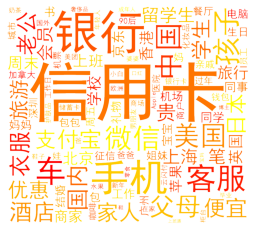

In [8]:
#Pass in argument for WC
wc = WordCloud(
   font_path = font_path, 
    width = 1000,
    height = 900,
    random_state= 2,
    background_color= 'rgba(255,255,255,0)',
    mode = 'RGBA',)


wc.generate_from_frequencies(wc_dict)

#.recolor method
plt.imshow(wc.recolor(colormap='autumn'), interpolation='bilinear')
plt.axis('off')
plt.show()

### Spacy， zh_core_web_sm 模型导入

In [9]:
#try to extract more info from Wc
import spacy 
from spacy import displacy
nlp = spacy.load('zh_core_web_sm')

### 文本获取和预处理

In [10]:
text = str(list(df['keyword'][0:100]))
print(text)
text = text.replace("'","")

['信用卡', '银行', '手机', '客服', '孩子', '车', '衣服', '中国', '父母', '微信', '美国', '老公', '家人', '便宜', '酒店', '贵', '支付宝', '国内', '学生', '笔', '包包', '同事', '苹果', '包', '妈妈', '护肤品', '旅行', '北京', '上海', '旅游', '日本', '留学生', '上班', '会员', '英国', '周末', '优惠', '书', '钱包', '商家', '同学', '奶茶', '姐妹', '鞋子', '妈', '礼物', '京东', '口红', '咖啡', '结婚', '学校', '爸', '银行卡', '化妆品', '香港', '机场', '90后', '电脑', '餐厅', '工作', '生日', '城市', '爸爸', '工作日', '储蓄卡', '机票', '水果', '商户', '毕业', 'Apple', '亲戚', '娃', '宝宝', '婆婆', '小白', '员工', '加拿大', '深圳', '上班族', '博主', '医院', '过年', '宝妈', '云闪付', '美团', '成年人', '年轻人', '周五', '新年', '商场', '奢侈品', '广州', '征信', '柜台', '国外', '零食', '男朋友', '在家', '欧洲', '鞋']


### 基于zh_core_web_sm 的实体识别

In [11]:
doc = nlp(text)
displacy.render(doc, style ='ent')

### 基于规则的（Rule Based）实体规律识别（Entity Ruler)

自定义三个标签词库
我在这里的考虑是，这是临时最快解，而且小红书后端应该已经有现场的标签词库，只需要对应导入就能进行识别工作。

In [12]:

demographic = ['孩子','老公', '家人', '学生','同事', '妈妈', '留学生','同学',
'姐妹', '妈', '爸','爸爸',  '亲戚', '娃', '宝宝', '婆婆', '小白', 
'员工','上班族', '博主','宝妈',
'成年人', '年轻人','男朋友',]

brand = ['微信','支付宝','云闪付', '美团','京东','Apple','苹果',]

product = ['信用卡', '银行', '手机', '车', '衣服', '包','口红', '咖啡', '书','护肤品','化妆品','奢侈品',]

在NER pipe前加入entity_ruler pipe

In [13]:
ruler = nlp.add_pipe('entity_ruler', before = 'ner')

分批导入规律到ruler

In [14]:
# demographic
i = 0
for i in range(len(demographic)):
    patterns = [{'label':'Demographic', 'pattern':demographic[i]}]
    i = i + 1
    ruler.add_patterns(patterns)

In [15]:
# brand
i = 0
for i in range(len(brand)):
    patterns = [{'label':'brand', 'pattern':brand[i]}]
    i = i + 1
    ruler.add_patterns(patterns)

In [16]:
# product
i = 0
for i in range(len(product)):
    patterns = [{'label':'product', 'pattern':product[i]}]
    i = i + 1
    ruler.add_patterns(patterns)

In [17]:
doc = nlp(text)

In [18]:
displacy.render(doc, style ='ent')

### 获取结构化数据，总结统计

In [40]:
df = pd.DataFrame()
text = []
label = []
for ent in doc.ents:
    text.append(ent.text)
    label.append(ent.label_)

df['word'] = text
df['label'] = label
df.head()

,word,label
0,信用卡,product
1,银行,product
2,手机,product
3,孩子,Demographic
4,车,product


In [44]:
df['label'].apply(lambda x: str(x)).value_counts()

Demographic    24
product        12
GPE            10
brand           7
DATE            4
LOC             1
Name: label, dtype: int64

### Reference:
- Dr. W.J.B Mattingly (2021), Using SpaCy's EntityRuler, Introduction to spaCy 3, avaliable at: spacy.pythonhumanities.com/02_01_entityruler.html
- spaCy, avaliable at spacy.io